# 구매력지수
- iloc[5]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_excel('../data/added_features/주택구매력지수.xlsx')

In [7]:
df

,지역,구분,2008-12-01 09:00:52,2009-01-01 09:00:52,2009-02-01 09:00:52,2009-03-01 09:00:52,2009-04-01 09:00:52,2009-05-01 09:00:52,2009-06-01 09:00:52,2009-07-01 09:00:52,...,2023-06-01 09:00:52,2023-07-01 09:00:52,2023-08-01 09:00:52,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52
0,전국,종합,84.831524,93.909633,95.855916,95.516787,95.580559,95.627822,95.076965,97.088958,...,132.982834,138.693375,137.592306,137.120482,129.805277,130.693655,134.336374,139.605862,139.970866,140.214962
1,전국,아파트,81.540413,90.450718,92.330818,92.137825,92.055518,91.966487,91.287363,93.040537,...,113.462418,117.698506,117.395270,116.724986,110.245578,110.495544,113.575298,118.299273,118.879366,119.086680
2,전국,단독,77.822329,85.572601,87.208737,86.677383,86.797046,87.168412,87.092823,89.301052,...,142.154064,147.461347,147.081430,146.577067,138.757366,139.707010,143.600952,146.704465,147.088029,147.344537
3,전국,연립,138.521202,153.603005,157.368340,156.446873,158.258510,158.503621,157.777141,161.722632,...,249.846537,259.174488,258.506756,257.620299,243.876582,245.545655,260.276725,262.289802,262.975567,271.666490
4,서울,종합,43.993331,48.636971,49.385622,49.195857,48.985029,49.007324,48.626448,49.422085,...,58.892398,61.530634,61.372108,61.161654,57.898757,58.364993,60.063860,62.419929,62.733930,62.843332
5,서울,아파트,38.306520,42.427615,42.995620,42.877559,42.564523,42.446703,41.985733,42.528486,...,43.394399,45.212818,45.056635,44.744578,42.135745,42.276556,43.530602,45.238137,45.435569,45.594376
6,서울,단독,36.322950,39.902653,40.596043,40.347172,40.145284,40.420151,40.353039,41.275293,...,51.530848,53.454738,53.317018,53.134187,50.299545,50.643791,52.055345,54.097272,54.238711,54.333298
7,서울,연립,87.458865,96.992434,99.095860,98.609500,99.866350,100.315578,99.941215,102.103448,...,152.683995,158.384410,157.976351,157.434627,149.035689,150.055678,154.238059,160.288212,160.707291,160.987549
8,강북14개구,종합,53.544986,59.025559,60.294934,60.050275,60.068617,60.390301,59.962421,60.954092,...,65.784062,68.788939,68.796153,68.560241,64.902639,65.346827,67.349233,70.370435,70.554420,70.965940
9,강북14개구,아파트,48.902740,53.985879,55.311334,55.095329,55.555844,55.754781,55.087305,55.812531,...,49.568752,51.834898,52.016603,51.838231,49.072727,49.408577,50.889136,52.885317,53.023587,53.224455


In [8]:
df.drop(['지역', '구분'], axis=1, inplace=True)
df

,2008-12-01 09:00:52,2009-01-01 09:00:52,2009-02-01 09:00:52,2009-03-01 09:00:52,2009-04-01 09:00:52,2009-05-01 09:00:52,2009-06-01 09:00:52,2009-07-01 09:00:52,2009-08-01 09:00:52,2009-09-01 09:00:52,...,2023-06-01 09:00:52,2023-07-01 09:00:52,2023-08-01 09:00:52,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52
0,84.831524,93.909633,95.855916,95.516787,95.580559,95.627822,95.076965,97.088958,95.253128,91.702629,...,132.982834,138.693375,137.592306,137.120482,129.805277,130.693655,134.336374,139.605862,139.970866,140.214962
1,81.540413,90.450718,92.330818,92.137825,92.055518,91.966487,91.287363,93.040537,91.265590,87.731369,...,113.462418,117.698506,117.395270,116.724986,110.245578,110.495544,113.575298,118.299273,118.879366,119.086680
2,77.822329,85.572601,87.208737,86.677383,86.797046,87.168412,87.092823,89.301052,87.680588,84.749628,...,142.154064,147.461347,147.081430,146.577067,138.757366,139.707010,143.600952,146.704465,147.088029,147.344537
3,138.521202,153.603005,157.368340,156.446873,158.258510,158.503621,157.777141,161.722632,158.687025,152.669722,...,249.846537,259.174488,258.506756,257.620299,243.876582,245.545655,260.276725,262.289802,262.975567,271.666490
4,43.993331,48.636971,49.385622,49.195857,48.985029,49.007324,48.626448,49.422085,48.387883,46.361254,...,58.892398,61.530634,61.372108,61.161654,57.898757,58.364993,60.063860,62.419929,62.733930,62.843332
5,38.306520,42.427615,42.995620,42.877559,42.564523,42.446703,41.985733,42.528486,41.694497,39.889754,...,43.394399,45.212818,45.056635,44.744578,42.135745,42.276556,43.530602,45.238137,45.435569,45.594376
6,36.322950,39.902653,40.596043,40.347172,40.145284,40.420151,40.353039,41.275293,40.282488,38.711219,...,51.530848,53.454738,53.317018,53.134187,50.299545,50.643791,52.055345,54.097272,54.238711,54.333298
7,87.458865,96.992434,99.095860,98.609500,99.866350,100.315578,99.941215,102.103448,99.893682,95.879859,...,152.683995,158.384410,157.976351,157.434627,149.035689,150.055678,154.238059,160.288212,160.707291,160.987549
8,53.544986,59.025559,60.294934,60.050275,60.068617,60.390301,59.962421,60.954092,59.649031,57.380575,...,65.784062,68.788939,68.796153,68.560241,64.902639,65.346827,67.349233,70.370435,70.554420,70.965940
9,48.902740,53.985879,55.311334,55.095329,55.555844,55.754781,55.087305,55.812531,54.972160,52.893251,...,49.568752,51.834898,52.016603,51.838231,49.072727,49.408577,50.889136,52.885317,53.023587,53.224455


In [9]:
cols = df.columns
cols = [str(col)[:10].replace('-', '')[:6] for col in cols]
cols

['200812',
 '200901',
 '200902',
 '200903',
 '200904',
 '200905',
 '200906',
 '200907',
 '200908',
 '200909',
 '200910',
 '200911',
 '200912',
 '201001',
 '201002',
 '201003',
 '201004',
 '201005',
 '201006',
 '201007',
 '201008',
 '201009',
 '201010',
 '201011',
 '201012',
 '201101',
 '201102',
 '201103',
 '201104',
 '201105',
 '201106',
 '201107',
 '201108',
 '201109',
 '201110',
 '201111',
 '201112',
 '201201',
 '201202',
 '201203',
 '201204',
 '201205',
 '201206',
 '201207',
 '201208',
 '201209',
 '201210',
 '201211',
 '201212',
 '201301',
 '201302',
 '201303',
 '201304',
 '201305',
 '201306',
 '201307',
 '201308',
 '201309',
 '201310',
 '201311',
 '201312',
 '201401',
 '201402',
 '201403',
 '201404',
 '201405',
 '201406',
 '201407',
 '201408',
 '201409',
 '201410',
 '201411',
 '201412',
 '201501',
 '201502',
 '201503',
 '201504',
 '201505',
 '201506',
 '201507',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512',
 '201601',
 '201602',
 '201603',
 '201604',
 '201605',
 '201606',

In [10]:
df.columns = cols
df

,200812,200901,200902,200903,200904,200905,200906,200907,200908,200909,...,202306,202307,202308,202309,202310,202311,202312,202401,202402,202403
0,84.831524,93.909633,95.855916,95.516787,95.580559,95.627822,95.076965,97.088958,95.253128,91.702629,...,132.982834,138.693375,137.592306,137.120482,129.805277,130.693655,134.336374,139.605862,139.970866,140.214962
1,81.540413,90.450718,92.330818,92.137825,92.055518,91.966487,91.287363,93.040537,91.265590,87.731369,...,113.462418,117.698506,117.395270,116.724986,110.245578,110.495544,113.575298,118.299273,118.879366,119.086680
2,77.822329,85.572601,87.208737,86.677383,86.797046,87.168412,87.092823,89.301052,87.680588,84.749628,...,142.154064,147.461347,147.081430,146.577067,138.757366,139.707010,143.600952,146.704465,147.088029,147.344537
3,138.521202,153.603005,157.368340,156.446873,158.258510,158.503621,157.777141,161.722632,158.687025,152.669722,...,249.846537,259.174488,258.506756,257.620299,243.876582,245.545655,260.276725,262.289802,262.975567,271.666490
4,43.993331,48.636971,49.385622,49.195857,48.985029,49.007324,48.626448,49.422085,48.387883,46.361254,...,58.892398,61.530634,61.372108,61.161654,57.898757,58.364993,60.063860,62.419929,62.733930,62.843332
5,38.306520,42.427615,42.995620,42.877559,42.564523,42.446703,41.985733,42.528486,41.694497,39.889754,...,43.394399,45.212818,45.056635,44.744578,42.135745,42.276556,43.530602,45.238137,45.435569,45.594376
6,36.322950,39.902653,40.596043,40.347172,40.145284,40.420151,40.353039,41.275293,40.282488,38.711219,...,51.530848,53.454738,53.317018,53.134187,50.299545,50.643791,52.055345,54.097272,54.238711,54.333298
7,87.458865,96.992434,99.095860,98.609500,99.866350,100.315578,99.941215,102.103448,99.893682,95.879859,...,152.683995,158.384410,157.976351,157.434627,149.035689,150.055678,154.238059,160.288212,160.707291,160.987549
8,53.544986,59.025559,60.294934,60.050275,60.068617,60.390301,59.962421,60.954092,59.649031,57.380575,...,65.784062,68.788939,68.796153,68.560241,64.902639,65.346827,67.349233,70.370435,70.554420,70.965940
9,48.902740,53.985879,55.311334,55.095329,55.555844,55.754781,55.087305,55.812531,54.972160,52.893251,...,49.568752,51.834898,52.016603,51.838231,49.072727,49.408577,50.889136,52.885317,53.023587,53.224455


In [11]:
df = pd.DataFrame(df.iloc[5])
df.reset_index(inplace=True)
df.columns = ['년도월', '구매력지수']
df

,년도월,구매력지수
0,200812,38.306520
1,200901,42.427615
2,200902,42.995620
3,200903,42.877559
4,200904,42.564523
...,...,...
179,202311,42.276556
180,202312,43.530602
181,202401,45.238137
182,202402,45.435569


In [12]:
df['년도월'] = df['년도월'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도월     184 non-null    int64  
 1   구매력지수   184 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


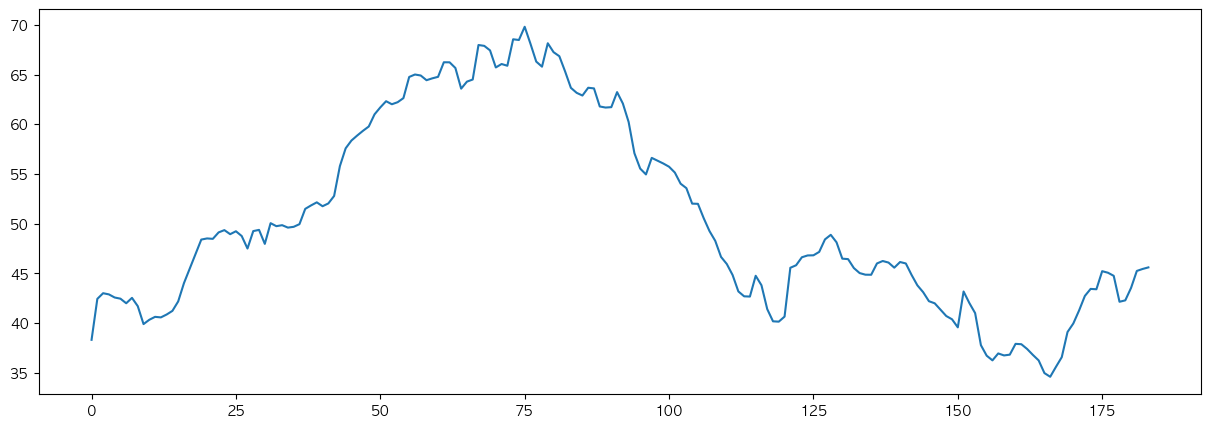

In [14]:
plt.figure(figsize=(15, 5))
df['구매력지수'].plot()
plt.show()

# 원본에 적용

In [15]:
origin_df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_91389/1432374496.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')


In [16]:
origin_df['계약년월']

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1128089    202307
1128090    202307
1128091    202308
1128092    202309
1128093    202309
Name: 계약년월, Length: 1128094, dtype: int64

In [17]:
pc_power_mapping = pd.Series({ym: power for ym, power in zip(df['년도월'], df['구매력지수'])})

origin_df['구매력지수'] = np.nan
origin_df['구매력지수'] = origin_df['구매력지수'].fillna(origin_df['계약년월']).map(pc_power_mapping)

In [22]:
origin_df[['구매력지수']].isna().sum()

구매력지수    114259
dtype: int64

In [30]:
origin_df['구매력지수'] = origin_df['구매력지수'].fillna(45.0)

In [32]:
origin_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,거래량,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,6716.0,1.0,중랑구,신내동,99.123,2.963517e+06,46.0,9,0,45.056635
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,6396.0,1.0,중랑구,신내동,99.328,2.963517e+06,41.4,9,0,44.744578


In [33]:
origin_df.to_csv('../data/preprocessed/17_purchasing_power_parity.csv', index=False)